# Introduction to Scikit-Learn (sklearn)
This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

In [1]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

In [2]:
import numpy as np

In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
heart_dis=pd.read_csv("heart-disease.csv");
heart_dis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#create x (features)
x =heart_dis.drop("target",axis=1)
y=heart_dis["target"]

In [6]:
import warnings
warnings .filterwarnings("ignore")

In [7]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
clf.fit(x_train,y_train);

In [12]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\ASUS\focusprojects\newmlprojects\env\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 23.1.2
   setuptools: 67.8.0
        numpy: 1.25.0
        scipy: 1.11.0
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
         prefix: mkl_rt
       filepath: C:\Users\ASUS\focusprojects\newmlprojects\env\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel
    num_threads: 6

       user_api: openmp
   internal_api: openmp
         prefix: vcomp
       filepath: C:\Users\ASUS\focusprojects\newmlprojects\env\Lib\site-packages\sklearn\.libs\vcomp140.dll
        version: None
    num_threads: 12

       user_api: blas
   internal_api: open

In [13]:
y_preds=clf.predict(x_test)
y_preds

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [14]:
y_test

147    1
83     1
162    1
98     1
28     1
      ..
245    0
115    1
144    1
13     1
269    0
Name: target, Length: 61, dtype: int64

In [15]:
#evaluate the  model
clf.score(x_train,y_train)

1.0

In [16]:
clf.score(x_test,y_test)

0.819672131147541

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [19]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.88      0.86      0.87        42

    accuracy                           0.82        61
   macro avg       0.79      0.80      0.79        61
weighted avg       0.82      0.82      0.82        61



In [20]:
confusion_matrix(y_test,y_preds)


array([[14,  5],
       [ 6, 36]], dtype=int64)

In [21]:
accuracy_score(y_test,y_preds)

0.819672131147541

In [22]:
#5.Improve model
#Try DIFFERENT amount of estimators

In [23]:
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with{i}) estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set:{clf.score(x_test,y_test)*100:.2f}%");
    print("")
    

trying model with10) estimators...
Model accuracy on test set:78.69%

trying model with20) estimators...
Model accuracy on test set:81.97%

trying model with30) estimators...
Model accuracy on test set:78.69%

trying model with40) estimators...
Model accuracy on test set:83.61%

trying model with50) estimators...
Model accuracy on test set:80.33%

trying model with60) estimators...
Model accuracy on test set:86.89%

trying model with70) estimators...
Model accuracy on test set:81.97%

trying model with80) estimators...
Model accuracy on test set:85.25%

trying model with90) estimators...
Model accuracy on test set:81.97%



In [24]:
#saving the model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pk1","wb"))

In [25]:
load_model=pickle.load(open("random_forest_model_1.pk1","rb"))
load_model.score(x_test,y_test)

0.819672131147541

#1.Getting our data ready to be used with machine

Three main things we have to do
1.spliting the data into features and labels(usually x and y)
2.Filling(also called imputing)
3.converting non-*numerical to numerical values


In [26]:
heart_dis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
x=heart_dis.drop("target",axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:
y=heart_dis["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [29]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [31]:
a=242
b=61
c=a+b
print(c)

303


In [32]:
len(heart_dis)

303

In [33]:
#make sure it all numerical


In [34]:
car_sales=pd.read_csv("car-sales-extended.csv")

In [35]:
len(car_sales)

1000

In [36]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [37]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [38]:
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

#splitting into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



In [39]:
x,y

(       Make Colour  Odometer (KM)  Doors
 0     Honda  White          35431      4
 1       BMW   Blue         192714      5
 2     Honda  White          84714      4
 3    Toyota  White         154365      4
 4    Nissan   Blue         181577      3
 ..      ...    ...            ...    ...
 995  Toyota  Black          35820      4
 996  Nissan  White         155144      3
 997  Nissan   Blue          66604      4
 998   Honda  White         215883      4
 999  Toyota   Blue         248360      4
 
 [1000 rows x 4 columns],
 0      15323
 1      19943
 2      28343
 3      13434
 4      14043
        ...  
 995    32042
 996     5716
 997    31570
 998     4001
 999    12732
 Name: Price, Length: 1000, dtype: int64)

In [40]:
#converting names to  number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
#doors has multiple values so we divide into categorical and set into features
one_hot=OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                               remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [41]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [42]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [43]:
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)

In [44]:
model.fit(x_train,y_train)

NameError: name 'model' is not defined

In [ ]:
model.score(x_test,y_test)

In [ ]:
###1.2 what is there are missing values

# 1.2 What if there were missing values?
Fill them with some value (also known as imputation).
Remove the samples with missing data altogether.

In [ ]:
#import car_sales
import pandas as pd
car_sales_mis=pd.read_csv("car-sales-extended-missing-data.csv");


In [ ]:
car_sales_mis.head()

In [ ]:
car_sales_mis.isna().sum() #it tells isna() how many missing values are there in the file

In [ ]:
#create x and y
x=car_sales_mis.drop("Price",axis=1)
y=car_sales_mis["Price"];

In [ ]:
x,y

In [ ]:
#converting names to  number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
#doors has multiple values so we divide into categorical and set into features
one_hot=OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                               remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

In [ ]:
### Fill the missing data with pandas

In [ ]:
#fill the "Make colum"
car_sales_mis["Make"].fillna("missing",inplace=True)
                             
#Fill the "Colour" Colum
car_sales_mis["Colour"].fillna("missing",inplace=True)

#Fill the "Odometer"
car_sales_mis['Odometer (KM)'].fillna(car_sales_mis['Odometer (KM)'].mean(),inplace=True)

#fill the doors
car_sales_mis['Doors'].fillna(4,inplace=True)

In [ ]:
#Check our data
car_sales_mis

In [ ]:
car_sales_mis.isna().sum()

In [ ]:
car_sales_mis.dropna(inplace=True)

In [ ]:
car_sales_mis.isna().sum()

In [ ]:
len(car_sales_mis)

In [ ]:
x =car_sales_mis.drop("Price",axis=1)
y = car_sales_mis['Price']

In [ ]:
x.shape,y.shape

In [ ]:
#converting names to  number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
#doors has multiple values so we divide into categorical and set into features
one_hot=OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                               remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

In [ ]:
transformed_x

In [ ]:
x

# Fill missing data with Pandas

In [ ]:
car_sales_miss=pd.read_csv("car-sales-extended-missing-data.csv")

In [ ]:
car_sales_miss

In [ ]:
car_sales_miss.isna().sum()

In [ ]:
car_sales_miss.dropna(subset=["Price"],inplace=True)
car_sales_miss.isna().sum()

In [ ]:
#spliting into x and y
# Split into X & y
X = car_sales_miss.drop("Price", axis=1)
y = car_sales_miss["Price"]

In [ ]:
from sklearn.impute import SimpleImputer
from  sklearn.compose import ColumnTransformer

#fill categorical values with missing & numerical values with mean
cat_imputer=SimpleImputer(strategy='constant',fill_value='missing')
door_imputer=SimpleImputer(strategy='constant',fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

#crate an imputater ( something that fills missing data)
# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

#Transform data
filled_x=imputer.fit_transform(x)
filled_x

In [ ]:
# Get our transformed data array's back into DataFrame's
car_sales_filled = pd.DataFrame(filled_x, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

In [ ]:
car_sales_filled

In [ ]:
car_sales_filled.isna().sum()

In [ ]:
#converting names to  number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
#doors has multiple values so we divide into categorical and set into features
one_hot=OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                               remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_filled)
transformed_x

In [ ]:
import numpy as np

In [ ]:
y.shape

In [ ]:
#Noew we got our data as numbers  and filled
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)

model=RandomForestRegressor()
l=model.fit(x_train,y_train)
model.score(x_test,y_test)

In [ ]:
model.score(x_train,y_train)

2. Choosing the right estimator/algorithm for your problem
Some things to note:

Sklearn refers to machine learning models, algorithms as estimators.
Classification problem - predicting a category (heart disease or not)
Sometimes you'll see clf (short for classifier) used as a classification estimator
Regression problem - predicting a number (selling price of a car)
If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

2.1 Picking a machine model for regression




In [2]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
import pandas as pd
housing_df=pd.DataFrame(housing["data"],columns=housing['feature_names'])
housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
housing_df["MedHouseVal"]=housing['target']
housing_df

In [7]:
   housing_df["Target"]=housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
housing_df=housing_df.drop('MedHouseVal',axis=1)

In [49]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
#import algorithum
from sklearn.linear_model import Ridge

np.random.seed(42)
x=housing_df.drop('Target',axis=1)
y=housing_df['Target']

In [ ]:
x,y

In [ ]:
#import algorithum
from sklearn.linear_model import Ridge

np.random.seed(42)
x=housing_df.drop('Target',axis=1)
y=housing_df['Target']
#split into train and test
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2)
#Instantiate and fit the model(on th training set)
model = Ridge()

model.fit(x_train,y_train)

model.score(x_test,y_test)


In [ ]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


In [ ]:
#import algorithum
from sklearn.linear_model import Ridge

np.random.seed(42)
x=housing_df.drop('Target',axis=1)
y=housing_df['Target']
#split into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#Instantiate and fit the model(on th training set)
model = Ridge()

model.fit(x_train,y_train)

model.score(x_test,y_test)


In [ ]:
#import algorithum
from sklearn.linear_model import Ridge

np.random.seed(42)

x=housing_df.drop('Target',axis=1)
y=housing_df['Target']
#split into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#Instantiate and fit the model(on th training set)
model = Ridge()

model.fit(x_train,y_train)

model.score(x_test,y_test)

What if Ridge didn't work or the score didn't fit our needs?

Well, we could always try a different model...

How about we try an ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [ ]:
#import random forest(ensemble )
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop('Target',axis=1)
y=housing_df['Target']
#split into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#Instantiate and fit the model(on th training set)
model = RandomForestRegressor()

model.fit(x_train,y_train)

model.score(x_test,y_test)


2.2 Picking a machine learning model for a classification problem
Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
iris

In [ ]:
iris

In [ ]:

iris_df=pd.DataFrame(iris["data"],columns=iris['feature_names'])
iris_df


In [ ]:
iris_df['Target']=iris['target']
iris_df

In [ ]:
iris_df

In [ ]:
iris_df.shape

In [ ]:
x=iris_df.drop('Target',axis=1)
y=iris_df['Target']

In [ ]:
x,y

In [ ]:
from sklearn.svm import LinearSVC
#split into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=LinearSVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
fig,ax=plt.subplots()
ax.plot(x,y);

In [ ]:
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=SGDClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)


In [8]:
import pandas as pd
heart_dis=pd.read_csv("heart-disease.csv")
heart_dis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
len(heart_dis)

In [ ]:
x=heart_dis.drop('target',axis=1)
y=heart_dis['target']

In [ ]:
from sklearn.svm import LinearSVC
#split into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=LinearSVC( max_iter=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

In [ ]:
heart_dis['target'].value_counts()

In [ ]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

# Tidbit:

1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

# 3. Fit the model/algorithm on our data and use it to make predictions
3.1 Fitting the model to the data
Different names for:

X = features, features variables, data
y = labels, targets, target variables

In [ ]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_dis.drop("target", axis=1)
y = heart_dis["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

#Fit the model to the data
clf.fit(X_train, y_train)




# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

In [ ]:
x.head()

In [ ]:
y.value_counts()

3.2 Make predictions using a machine learning model
2 ways to make predictions:

predict()
predict_proba()

In [ ]:
x_test.head()

In [ ]:
clf.predict(x_test)

In [ ]:
np.array([y_test])

In [ ]:
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

In [ ]:
 from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)    

In [18]:
clf.score(X_test, y_test)

NameError: name 'X_test' is not defined

In [17]:
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

0.8043478260869565

In [16]:
#predict proba return proprbilities
clf.predict_proba(x_test[:5])

array([[0.43, 0.57],
       [0.09, 0.91],
       [0.13, 0.87],
       [0.69, 0.31],
       [0.56, 0.44]])

In [ ]:
clf.predict(x_test[:5])

In [ ]:
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop("Target",axis=1)
y=housing_df['Target']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)

#Make prediction 
y_preds=model.predict(x_test)

In [ ]:
y_preds[:10]

In [ ]:
y_test[:10]

In [ ]:
len(y_preds)

In [ ]:
len(y_test)

In [ ]:
#comparpe the prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds,y_test)

In [ ]:
housing_df["Target"]

In [ ]:
what_were_covering

4. Evaluating a machine learning model
Three ways to evaluate Scikit-Learn models/estimators:

Estimator's built-in score() method
The scoring parameter
Problem-specific metric functions
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
heart_dis

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)


x=heart_dis.drop("target",axis=1)
y=heart_dis['target']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)



In [ ]:
model.score(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
  from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop("Target",axis=1)
y=housing_df['Target']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100
                           )
model.fit(x_train,y_train)



In [ ]:
model.score(x_test,y_test)

In [ ]:
model.score(x_test,y_test)

In [ ]:
model.score(x_test,y_test)

In [ ]:
model.score(x_test,y_test)

4.2 evaluating a model using the scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_dis.drop("target",axis=1)
y=heart_dis['target']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)

clf.fit(x_train,y_train)




In [ ]:
clf.score(x_test,y_test)

In [ ]:
cross_val_score(clf,x,y,cv=10)

In [ ]:
np.random.seed(42)

clf_single_score=clf.score(x_test,y_test)

clf_cross_val_score=np.mean(cross_val_score(clf,x,y,cv=5))

clf_single_score,clf_cross_val_score

# 4.2.1 Classification model evaluation metrics

1. Acuuracy
2. Area under ROC Curve
3. Confusion matrix
4. Classification report

Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_dis.drop("target",axis=1)
y=heart_dis['target']

clf=RandomForestClassifier()

cross_val_score=cross_val_score(clf,x,y,cv=5)


In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f"Heart Disease Classifier Cross-Validated Acuuracy:{np.mean(cross_val_score)*100:.2f}%")


Area under curve (AUC)
ROC curve
ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

1. True positive = model predicts 1 when truth is 1
2. False positive = model predicts 1 when truth is 0
3. True negative = model predicts 0 when truth is 0
4. False negative = model predicts 0 when truth is 1

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

clf.fit(x_train,y_train)

y_probs=clf.predict_proba(x_test)

y_probs[:10]

In [ ]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

In [ ]:
#caluclate fpr,tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
#craet a function a plotting roc
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    
    """
      Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
  
  """
    
 #   plot roc
plt.plot(fpr,tpr,color="orange",label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle="--",label="Guessing")

#Customize the plot

plt.x_label="False positive Rate(fpr)"
plt.y_label='True positive rate(fpr)'
plt.title='Receciver Operating charateristics(ROC)'
plt.legend()
plt.show()

plot_roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

In [ ]:
#plot perfect Roc curve and AUC
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
#plot perfect Roc curve and AUC
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [ ]:
fpr[:10]

In [ ]:
roc_auc_score(y_test,y_test)

# Confusion matrix
The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.



In [ ]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(x_test)

confusion_matrix(y_test,y_preds)


In [ ]:
#visulize  confusion matrix with pd.crosstab

pd.crosstab(y_test,y_preds,
           rownames=['Actual Labels'],colnames=['Predicted Labels'])



In [ ]:
22+7+8+24

In [ ]:
len(x_test)

In [ ]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat=confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat);

**Confusion matrix

a confusion matrix is a quick way to compare the labels a model predicts and the actual labels

this gives you an idea of where the models is getting confused

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test,y_preds)

In [ ]:
sklearn.__version__

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y)


In [ ]:
clf

In [ ]:
model

In [ ]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

#Classification report 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

In [ ]:
clf.score(y_test,y_preds)

In [ ]:
y_test,y_preds

In [ ]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True,
                                   zero_division=0))

In [ ]:
## Regression model evaluation

# 4.2.2 Regression model evaluation metrics
Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:

R^2 (pronounced r-squared) or coefficient of determination
1. Mean absolute error (MAE)
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

# R^2

What R-squared does: Compares your models predictions to the mean of the targets. 
Values can range from negative infinity (a very poor model) to 1.
For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop("Target",axis=1)
y=housing_df['Target']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)



In [ ]:
model.score(x_test,y_test)

In [ ]:
housing_df.head()

In [ ]:
from sklearn.metrics import r2_score

#fill an array with y_test mean

y_test_mean=np.full(len(y_test),y_test.mean())

In [ ]:
y_test_mean[:10]

In [ ]:
r2_score(y_true=y_test,y_pred=y_test_mean)

In [ ]:
r2_score(y_true=y_test,y_pred=y_test)


# Mean absolute error (MAE)

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [ ]:
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae


In [ ]:
y_preds

In [ ]:
y_test

In [ ]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

In [ ]:
df["differences"].mean()

In [ ]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

# Mean squared error (MSE)

MSE is the mean of the square of the errors between actual and predicted values.

In [ ]:
from sklearn.metrics import mean_squared_error

y_preds=model.predict(x_test)
mse=mean_squared_error(y_preds,y_test)
mse

In [ ]:
df['square_difference']=np.square(df["differences"])
df.head()

In [ ]:
squared=np.square(df['differences'])
squared.mean()

In [ ]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16 

In [ ]:
df_large_error.head()

In [ ]:
df["differences"].mean()

In [ ]:
# Calculate MSE with large error
df_large_error["square_difference"].mean()

# 4.2.3 Finally using *scoring parameter

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_dis.drop("target",axis=1)
y=heart_dis['target']

clf=RandomForestClassifier(n_estimators=100)



In [ ]:
np.random.seed(42)

cv_acc=cross_val_score(clf,x,y,cv=5,scoring=None)
cv_acc

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf.fit(x_train,y_train)

In [ ]:
#Cross_validated accuracy
print(f"The cross -validated accuracy is :{np.mean(cv_acc)*100:.2f}%")

In [ ]:
clf.score(x_test,y_test)

In [ ]:
np.random.seed(42)

cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

In [ ]:
#Cross_validated accuracy
print(f"The cross -validated accuracy is :{np.mean(cv_acc)*100:.2f}%")

In [ ]:
#Precision
cv_precision =cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

In [ ]:
#Cross_validated precision
print(f"The cross -validated precision is :{np.mean(cv_precision)*100:.2f}%")

In [ ]:
np.random.seed(42)

cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall

In [ ]:
#Cross_validated recall
print(f"The cross -validated recall is :{np.mean(cv_recall)*100:.2f}%")

lets see the'scoring' parameter being using regression

In [ ]:
housing_df


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop("Target",axis=1)
y=housing_df['Target']

model=RandomForestRegressor(n_estimators=100)


In [ ]:
#variance
np.random.seed(42)

cv_var=cross_val_score(model,x,y,cv=5,scoring="explained_variance")
cv_var

In [ ]:
#Cross_validated variance
print(f"The cross -validated variance is :{np.mean(cv_var)*100:.2f}%")

In [ ]:
#cross validating r2
np.random.seed(42)

cv_r2=cross_val_score(model,x,y,cv=3,scoring=None)
cv_r2


In [ ]:
#Cross_validated r2
print(f"The cross -validated r2 is :{np.mean(cv_r2)*100:.2f}%")

In [ ]:
#mean Absolute error
cv_mae=cross_val_score(model,x,y,cv=3,scoring="neg_mean_absolute_error")
cv_mae

In [ ]:
#Cross_validated mae
print(f"The cross -validated mae is :{np.mean(cv_mae)*100:.2f}%")

In [ ]:
#mean square error
cv_mse=cross_val_score(model,x,y,cv=3,scoring="neg_mean_squared_error")
cv_mse

In [ ]:
#Cross_validated mse
print(f"The cross -validated mse is :{np.mean(cv_mse)*100:.2f}%")

In [50]:
##4.3 USING DIFFERENT  evaluation metriics as Scikit -Learn functon

In [61]:
from sklearn.metrics  import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x=heart_dis.drop("target",axis=1)
y=heart_dis['target']

clf=RandomForestClassifier(n_estimators=100)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf.fit(x_train,y_train)

print("Classifier metrics on the test set")
y_preds=clf.predict(x_test)

print(f"ACCURACY : {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"precision : {precision_score(y_test,y_preds)}")
print(f"recall : {recall_score(y_test,y_preds)}")
print(f"F1 : {f1_score(y_test,y_preds)}")



Classifier metrics on the test set
ACCURACY : 85.25%
precision : 0.8484848484848485
recall : 0.875
F1 : 0.8615384615384615


In [65]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x=housing_df.drop("Target",axis=1)
y=housing_df['Target']

model=RandomForestRegressor(n_estimators=100)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model.fit(x_train,y_train)

y_preds=model.predict(x_test)

print("Regression metrics on the test set")
print(f"r2 score : {r2_score(y_test,y_preds)}")
print(f"mean_absolute_error: {mean_absolute_error(y_test,y_preds)}")
print(f"mean_squared_error: {mean_squared_error(y_test,y_preds)}")



Regression metrics on the test set
r2 score : 0.8065734772187598
mean_absolute_error: 0.32659871732073664
mean_squared_error: 0.2534678520824551


# 5.  improving a model
First predictions = baseline predictions. First model = baseline model.

From a data perspective:

* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:

* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:

* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [9]:
from sklearn.ensemble  import RandomForestClassifier

clf=RandomForestClassifier()


In [10]:
from sklearn.metrics  import accuracy_score,precision_score,recall_score,f1_score

In [11]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 5.1 Tuning hyperparameters by hand
Let's make 3 sets, training, validation and test.

We're going to try and adjust:

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [12]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels on a classification.
    """
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    
    print(f"Accuracy: {accuracy_score(y_true, y_preds) * 100:.2f}%")
    print(f"Precision: {precision_score(y_true, y_preds)}")
    print(f"Recall: {recall_score(y_true, y_preds)}")
    print(f"F1: {f1_score(y_true, y_preds)}")
    
    return metric_dict


In [13]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.random.seed(42)

#shuffle the data

heart_dis_shuf=heart_dis.sample(frac=1)

x=heart_dis_shuf.drop("target",axis=1)
y=heart_dis_shuf["target"]

#split the data into train ,validation & test sets
train_split = round(0.7*len(heart_dis_shuf))#70% of data
valid_split =round(train_split + 0.15*len(heart_dis_shuf))#15 of data

x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

clf=RandomForestClassifier()
clf.fit(x_train,y_train)

#make baseline  prediction
y_preds=clf.predict(x_valid)

#eevaluate the classifier

baseline_metrics = evaluate_preds(y_valid,y_preds)

baseline_metrics


Accuracy: 82.22%
Precision: 0.8148148148148148
Recall: 0.88
F1: 0.8461538461538461


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [14]:
np.random.seed(42)

#create a  second classifier with  different hyperparameters

clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train,y_train)

#make predictions
y_preds_2 = clf_2.predict(x_valid)

#evaluate the 2nd classifier
clf_2_metrics=evaluate_preds(y_valid,y_preds)

Accuracy: 82.22%
Precision: 0.8148148148148148
Recall: 0.88
F1: 0.8461538461538461


In [15]:
np.random.seed(42)

#create a  third classifier with  different hyperparameters

clf_3=RandomForestClassifier(n_estimators=100,max_depth=10)
clf_3.fit(x_train,y_train)

#make predictions
y_preds_3 = clf_3.predict(x_valid)

#evaluate the 2nd classifier
clf_3_metrics=evaluate_preds(y_valid,y_preds)

Accuracy: 82.22%
Precision: 0.8148148148148148
Recall: 0.88
F1: 0.8461538461538461


# 5.2 Hyperparameter tuning with RandomizedSearchCV

In [24]:
from sklearn.model_selection  import RandomizedSearchCV
from sklearn.model_selection  import train_test_split
grid={"n_estimators":[10,100,200,500,1000,1200],
     "max_depth":[None,5,10,15,20,30,35],
     "max_features":["auto","sqrt"],
     "min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}

np.random.seed(42)

x=heart_dis_shuf.drop("target",axis=1)
y=heart_dis_shuf["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#instantiate Randomforest classifier

clf=RandomForestClassifier(n_jobs=1)

#setup RandomizedSearchCV

rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10,#numbers of models to try
                         cv=5,verbose=2)

#Fit the Rarndomized version of clf
rs_clf.fit(x_train,y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_esti

C:\Users\ASUS\focusprojects\newmlprojects\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\focusprojects\newmlprojects\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\focusprojects\newmlprojects\env\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\focusprojects\newmlprojects\env\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
   

In [25]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [26]:
#make prediction with the best hyperparamters

rs_y_preds=rs_clf.predict(x_test)

#evaluate the prediction
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Accuracy: 81.97%
Precision: 0.7741935483870968
Recall: 0.8571428571428571
F1: 0.8135593220338982


# 5.3 HyperParamater tuning with GridSearchCV



In [28]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 15, 20, 30, 35],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [29]:
  grid_2={'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [2],
         'min_samples_leaf': [1, 2]}

In [31]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
x=heart_dis_shuf.drop("target",axis=1)
y=heart_dis_shuf["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf

gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, 

C:\Users\ASUS\focusprojects\newmlprojects\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\focusprojects\newmlprojects\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\focusprojects\newmlprojects\env\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\focusprojects\newmlprojects\env\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
   

In [32]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [33]:
gs_y_preds=gs_clf.predict(x_test)


gs_metrics =evaluate_preds(y_test,gs_y_preds)

Accuracy: 80.33%
Precision: 0.75
Recall: 0.8571428571428571
F1: 0.7999999999999999


In [34]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics

,baseline,clf_2,random search,grid search
accuracy,0.82,0.82,0.82,0.80
precision,0.81,0.81,0.77,0.75
recall,0.88,0.88,0.86,0.86
f1,0.85,0.85,0.81,0.80


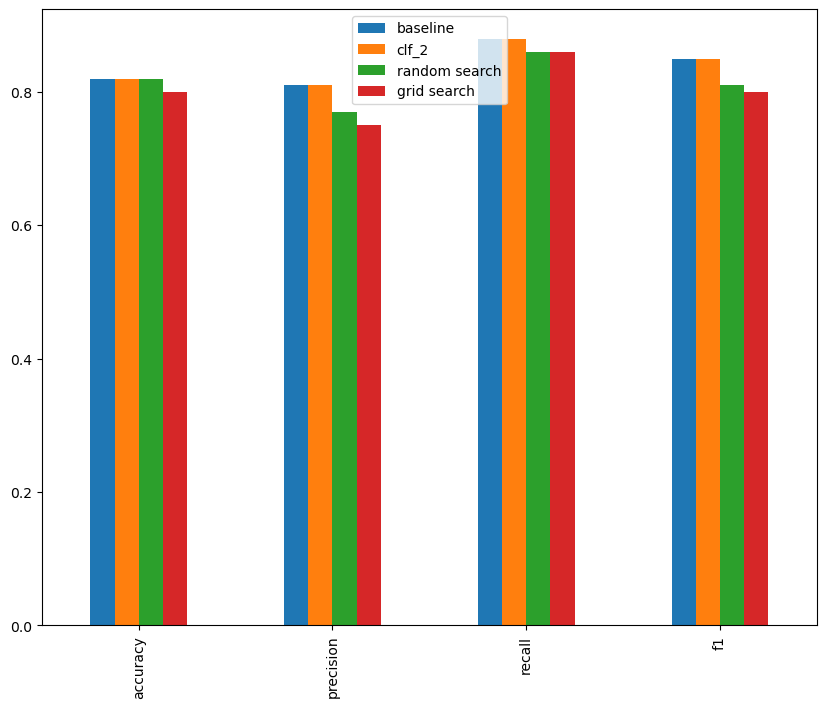

In [35]:


compare_metrics.plot.bar(figsize=(10, 8));

# 6.Saving and loading trained machine learning models
1. With Python's  'pickle' module
2. With the 'joblib' module


# **Pickle**

In [36]:
import pickle


#save an existing model to the file
pickle.dump(gs_clf,open("gs_random_forest_model_1.pk1","wb"))

In [40]:
 #load  a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pk1","rb"))

In [42]:
#make some prediction
pickle_y_preds =loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

Accuracy: 80.33%
Precision: 0.75
Recall: 0.8571428571428571
F1: 0.7999999999999999


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

# Joblib

In [43]:
from joblib import dump,load

#save model to file

dump(gs_clf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [44]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [46]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 80.33%
Precision: 0.75
Recall: 0.8571428571428571
F1: 0.7999999999999999


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

# 7.Putting it all together


In [3]:
import numpy as np 
import pandas as pd
data= pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [4]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [5]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

##Steps we want to do  ( all in one cell):
1. Fill missing dat
2. convert data to numbers
3. Build a model on the data

In [24]:
#getting our data ready
 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

#Setup random seed
import numpy as np
np.random.seed(42)

#import data and drop rows with missing labels
data=pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=['Price'],inplace=True)

#define  different deatures and transformer pipleine
cateogorical_features=["Make",'Colour']

cateogorical_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
                                         
                                         ("onehot",OneHotEncoder(handle_unknown="ignore"))])
                            
door_feature=['Doors']
door_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
    
])

numeric_features=['Odometer (KM)']
numeric_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])

#Setup  preprocessing steps(fill missing values ,then convert to numbers)

preprocessor =ColumnTransformer(
                transformers=[
                    ("cat",cateogorical_transformer,cateogorical_features),
                    ("door",door_transformer,door_feature),
                    ("num",numeric_transformer,numeric_features)
                ])

#Creating a preprocessing and modelling pipline
model =Pipeline(steps=[("preprocessor",preprocessor),
                      ("model",RandomForestRegressor())])


#Split the data
x=data.drop("Price",axis=1)
y=data["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#fit and score the model

model.fit(x_train,y_train)
model.score(x_test,y_test)





0.22188417408787875

In [12]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                                                  ['Doors']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Odometer (KM)'])])),
                ('model', RandomForestRegressor())])

In [13]:
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Make', 'Colour']),
                                ('door',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=4,
                                                                strategy='constant'))]),
                                 ['Doors']),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['Odometer (KM)'])])

In [25]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [17]:
data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

\It'sis also possible to  use Grid Searchcv Or RandomizedSearchCV

In [27]:
#Use GridSearchCV with our regression Pipline

from sklearn.model_selection import GridSearchCV

pipe_grid={
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":[None,"auto"],
    "model__min_samples_split":[2,4]    
}

gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=None, model__min_samp

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__n

[CV] END model__max_depth=5, model__max_features=None, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=None, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=None, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=None, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=None, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=None, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__str

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.0s


C:\Users\ASUS\focusprojects\newmlprojects\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\focusprojects\newmlprojects\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\focusprojects\newmlprojects\env\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\focusprojects\newmlprojects\env\L

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': [None, 'auto'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [30]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': None,
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}

In [31]:
gs_model.score(x_test,y_test)

0.3339554263158365